<a href="https://colab.research.google.com/github/anandakhilesh/CSIS4495/blob/master/CSIS4495_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Python Libraries**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rcParams

import csv

## **Loading Young People Survey  files from Github**

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/anandakhilesh/CSIS4495/master/responses.csv')
cols = pd.read_csv('https://raw.githubusercontent.com/anandakhilesh/CSIS4495/master/columns.csv')


## **Counting the number of nulls in the response file**


In [0]:
totBlanks = data.isnull().sum()
totBlanks.sum()

608

##Checking number of rows and columns of data file loaded from github

In [0]:
data.shape

(1010, 150)

##Printing the names of the columns

In [0]:
data.head(0)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats


##Descriptive Analysis of Age field

In [0]:
data['Age'].describe()

count    1003.000000
mean       20.433699
std         2.828840
min        15.000000
25%        19.000000
50%        20.000000
75%        22.000000
max        30.000000
Name: Age, dtype: float64

##Using fivethirtyeight theme/graph style

In [0]:
%matplotlib inline
plt.style.use('fivethirtyeight')

##Displaying all the null values of the columns and sorting them in ascending order

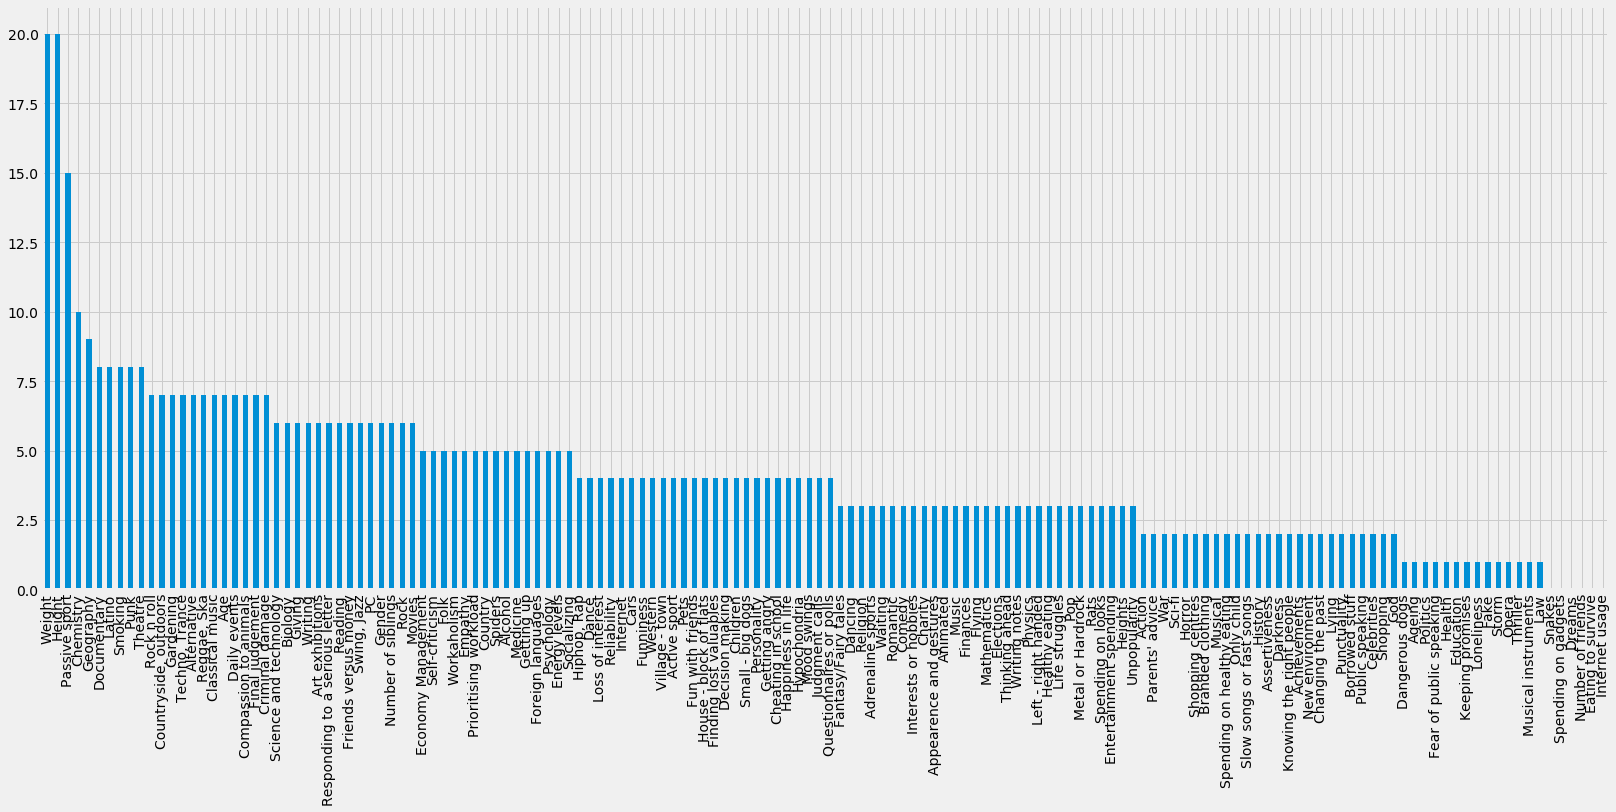

In [0]:
blanks = data.isnull().sum().sort_values(ascending=False)
blanks.plot(kind='bar', figsize=(25, 10))

##Checking the null values for other file named Columns.csv

In [0]:
cols.isnull().sum()

original    0
short       0
dtype: int64

##Removing Blanks and filling them with Special character Nan

In [0]:
rmvNumBlank = data.fillna(data.median())
missing = np.nan
rmvNumBlank.fillna(missing)
rmvBlankSum = rmvNumBlank.isnull().sum()
rmvBlankSum.sum()

37

##Assigning the cleaned resultant dataset


In [0]:
responsesData = rmvNumBlank

##Creating BMI for all responses and adding to responses dataset
##bmi=Height/(Weight)^2 

In [0]:
bmi= responsesData['Weight']/(responsesData['Height']*0.01)

responsesData.insert(150, "bmi", bmi)

bmiCategory = pd.Series([])
for i in range(len(responsesData)): 
    if responsesData["bmi"][i] <= 15.0: 
        bmiCategory[i]="Very severely underweight"
  
    elif responsesData["bmi"][i] > 15.0 and responsesData["bmi"][i] <= 16.0: 
        bmiCategory[i]="Severely underweight"
    
    elif responsesData["bmi"][i] > 16.0 and responsesData["bmi"][i] <= 18.5: 
        bmiCategory[i]="Underweight"
        
    elif responsesData["bmi"][i] > 18.5 and responsesData["bmi"][i] <= 25.0: 
        bmiCategory[i]="Normal (healthy weight)"
    
    elif responsesData["bmi"][i] > 25.0 and responsesData["bmi"][i] <= 30.0: 
        bmiCategory[i]="Overweight"
        
    elif responsesData["bmi"][i] > 30.0 and responsesData["bmi"][i] <= 35.0: 
        bmiCategory[i]="Moderately obese"
     
    elif responsesData["bmi"][i] > 35.0 and responsesData["bmi"][i] <= 40.0: 
        bmiCategory[i]="Severely obese"
        
    elif responsesData["bmi"][i] > 40.0: 
        bmiCategory[i]="Very severely obese"
  
    else: 
        bmiCategory[i]="No Category" 
        
responsesData.insert(151, "bmiCategory", bmiCategory)

## Creating age groups for all responses and adding to responses dataset

In [0]:
ageGroup = pd.Series([])
for i in range(len(responsesData)): 
    if responsesData["Age"][i] >= 15 and responsesData["Age"][i] <= 20: 
        ageGroup[i]="15 to 20"
  
    elif responsesData["Age"][i] > 20 and responsesData["Age"][i] <= 25: 
        ageGroup[i]="20 to 25"
    
    elif responsesData["Age"][i] > 25 and responsesData["Age"][i] <= 30:
        ageGroup[i]="25 to 30"
  
    else: 
        ageGroup[i]="No Category"
responsesData.insert(152, "ageGroup", ageGroup)

## Exporting cleaned dataset to a csv file names cleanResponses.csv
###will be used for further Data Analysis

In [0]:
responsesData.to_csv("cleanResponses.csv", index=False)
responsesData

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,bmi,bmiCategory,ageGroup
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,29.447853,Overweight,15 to 20
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,35.582822,Severely obese,15 to 20
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats,38.068182,Severely obese,15 to 20
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,4.0,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,34.302326,Moderately obese,20 to 25
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow,34.705882,Moderately obese,15 to 20
5,5.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,1.0,3.0,5.0,5.0,5.0,5.0,2.0,3.0,3.0,4.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,2.0,3.0,4.0,4.0,1.0,4.0,...,4.0,2.0,2.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,few hours a day,2.0,3.0,3.0,3.0,1.0,4,4.0,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats,41.397849,Very severely obese,15 to 20
6,5.0,5.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,3.0,5.0,2.0,4.0,2.0,1.0,5.0,3.0,1.0,3.0,5.0,5.0,3.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,3.0,5.0,...,5.0,4.0,3.0,2.0,3.0,3.0,4.0,3.0,3.0,5.0,5.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,5.0,less than an hour a day,4.0,3.0,1.0,3.0,4.0,1,5.0,20.0,177.0,50.0,1.0,female,right handed,secondary school,no,village,house/bungalow,28.248588,Overweight,15 to 20
7,5.0,3.0,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,3.0,5.0,2.0,3.0,1.0,1.0,5.0,4.0,1.0,2.0,..

##Mapping similar columns to one group

In [0]:
music = responsesData.iloc[:,1:19]
movies = responsesData.iloc[:,19:31]
interests = responsesData.iloc[:,31:46]
hobbies = responsesData.iloc[:,46:63]
phobias = responsesData.iloc[:,63:73]
health = responsesData.iloc[:,73:76]
traits = responsesData.iloc[:,76:133]
spending = responsesData.iloc[:,133:140]
demographics = responsesData.iloc[:,140:150]



##Plotting the groups with mean value for the mapped groups

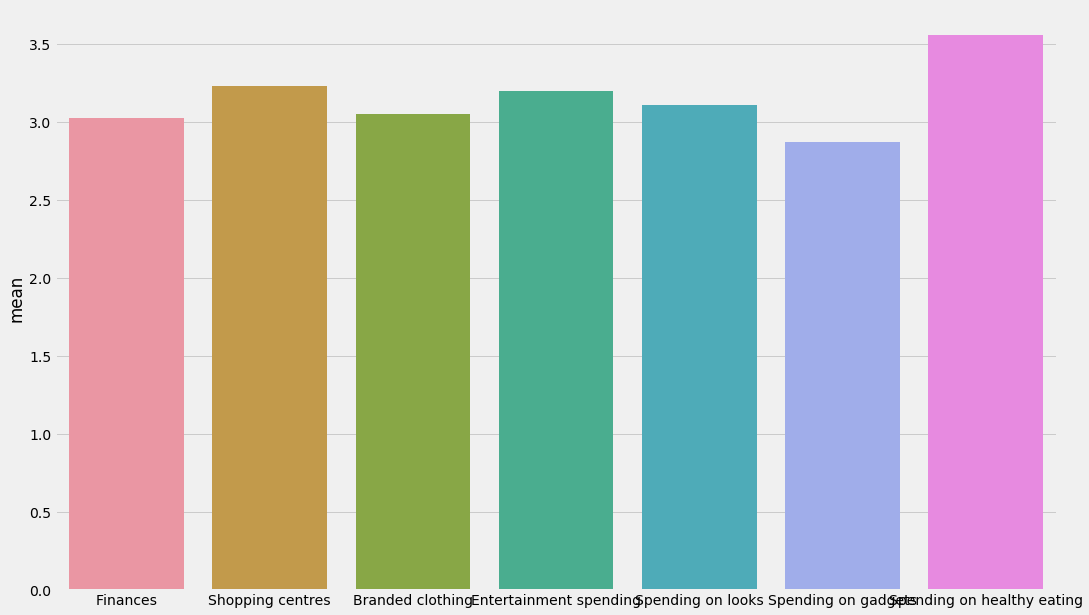

In [0]:
plt.figure(figsize=(16,10))
sns.barplot(x = spending.describe().columns, y=spending.describe().loc["mean"])

##Coorelation among the categories

### A. On Music

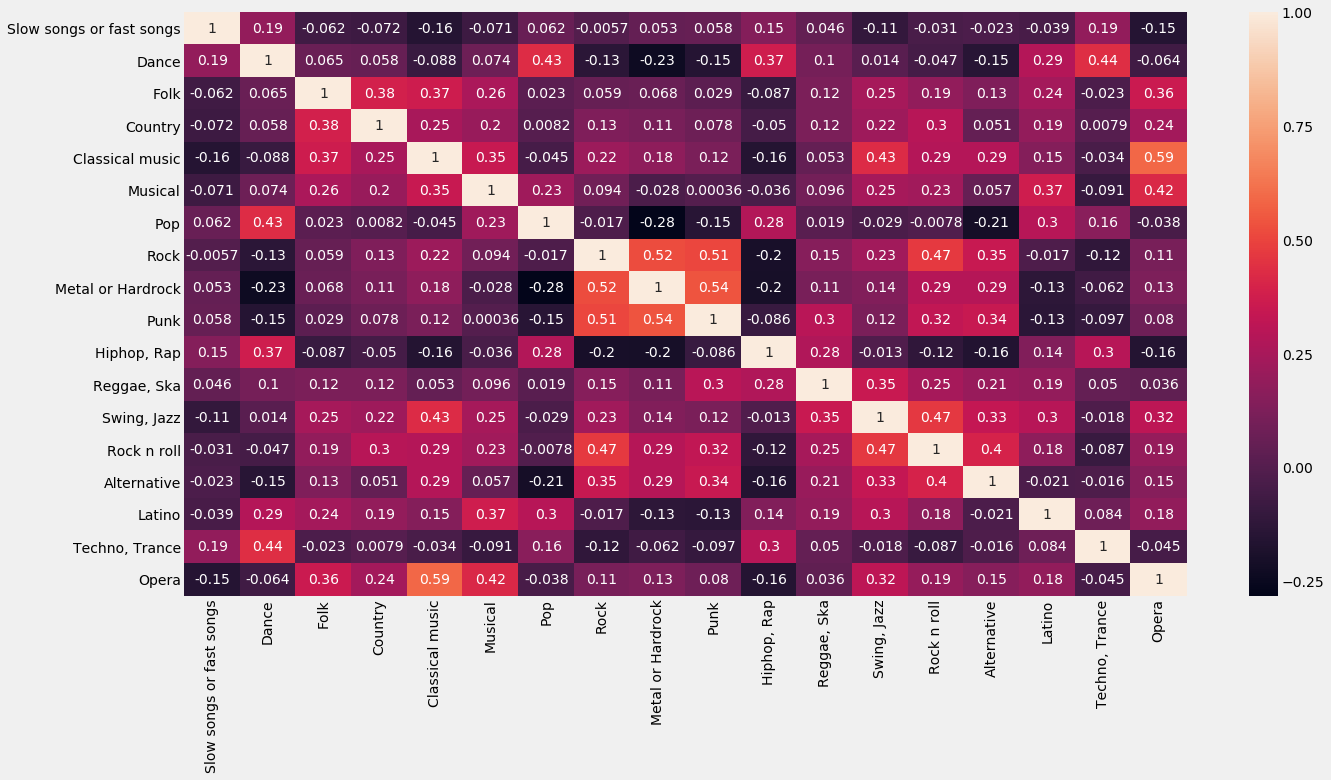

In [0]:
  plt.figure(figsize=(20,10))
  sns.heatmap(music.corr(),annot=True)
  

###B. On Interests

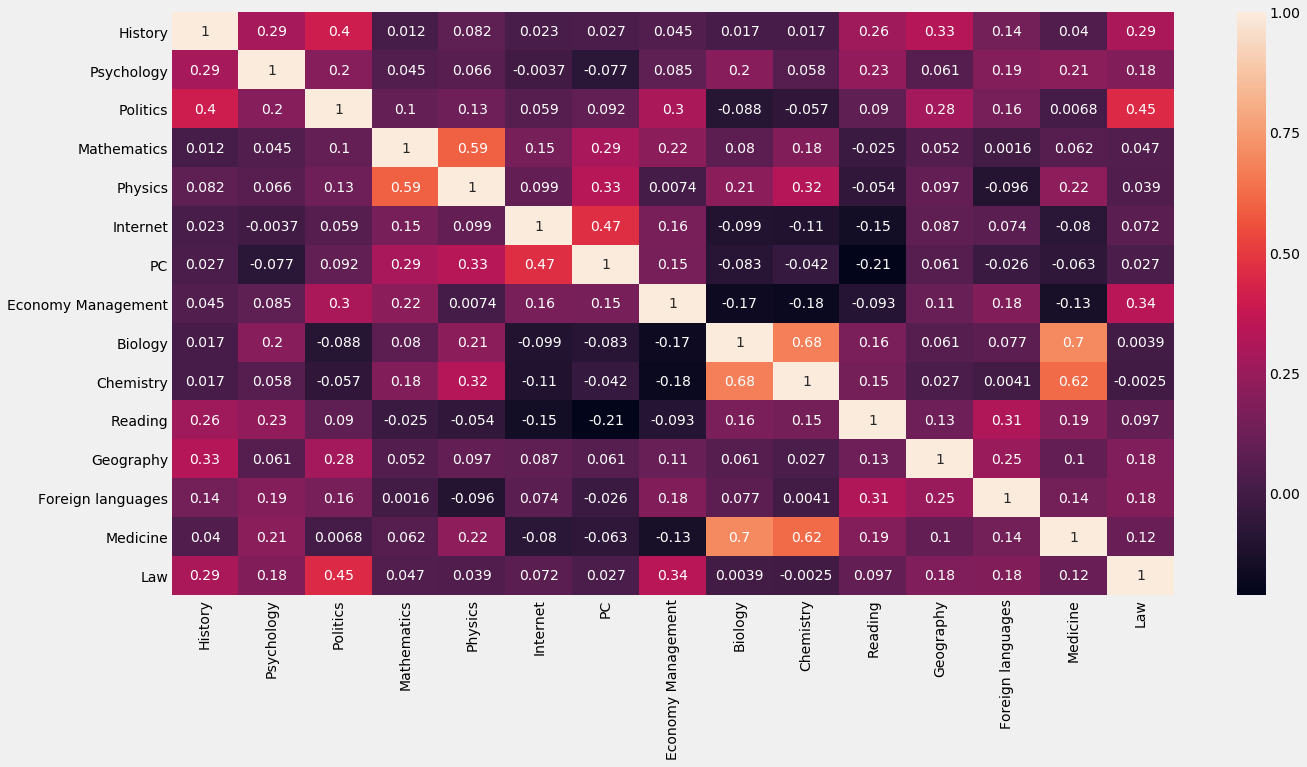

In [0]:
plt.figure(figsize=(20,10))
sns.heatmap(interests.corr(),annot=True)
  

In [0]:
traits = responsesData.iloc[:,76:88]
music = responsesData.iloc[:,1:13]
movies = responsesData.iloc[:,19:31]

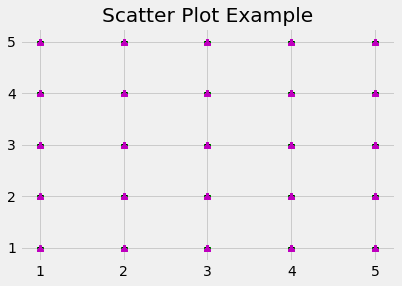

In [0]:
y1 = traits
x1 = music
y2 = traits
x2 = movies


# Colors: https://matplotlib.org/api/colors_api.html



plt.scatter(x1, y1,marker='*', color='g')
plt.scatter(x2, y2, marker='^', color='m')
plt.title('Scatter Plot Example')
plt.show()

<Figure size 1008x1008 with 0 Axes>

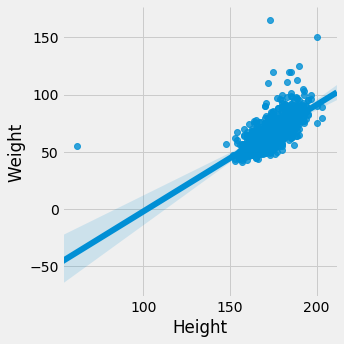

In [0]:
plt.figure(figsize=(14,14))
sns.lmplot(x='Height', y='Weight', data=responsesData)

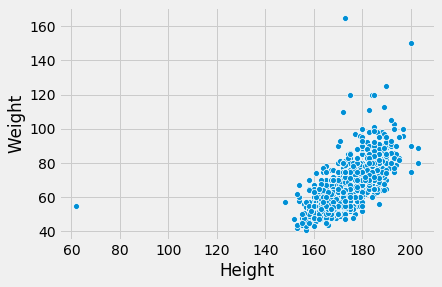

In [0]:

sns.scatterplot(y='Weight', x='Height', data=responsesData)

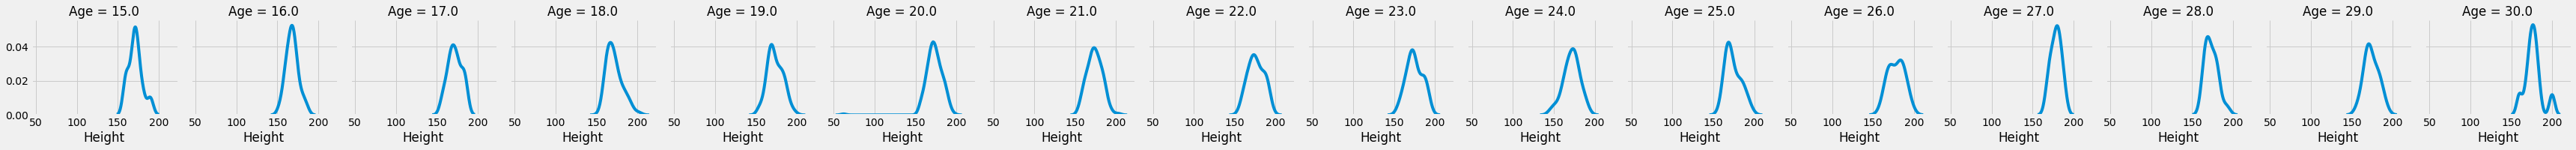

In [0]:

g = sns.FacetGrid(responsesData, col='Age')
g = g.map(sns.kdeplot, 'Height')

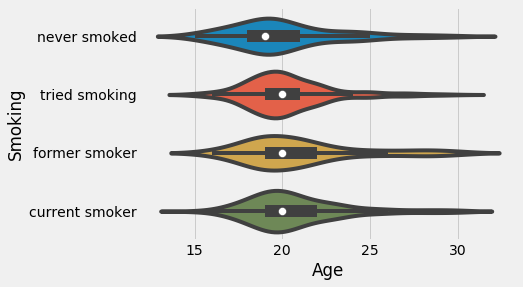

In [0]:
sns.violinplot(responsesData['Age'], responsesData['Smoking']) #Variable Plot



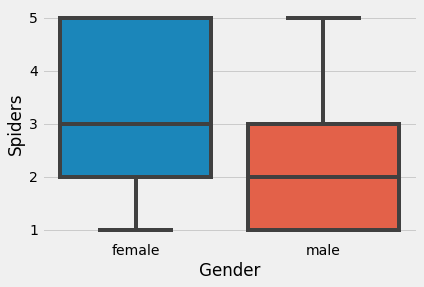

In [0]:
sns.boxplot(x = 'Gender', y = 'Spiders', data = responsesData)


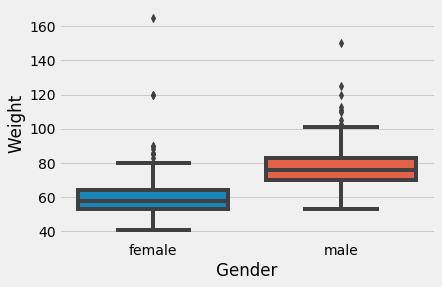

In [0]:
sns.boxplot(x = 'Gender', y = 'Weight', data = responsesData)

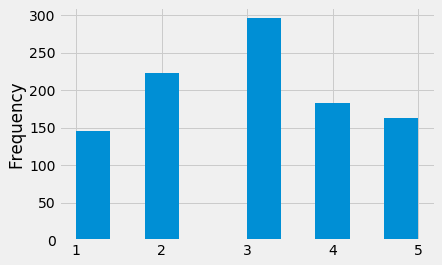

In [0]:
responsesData['Workaholism'].plot('hist')

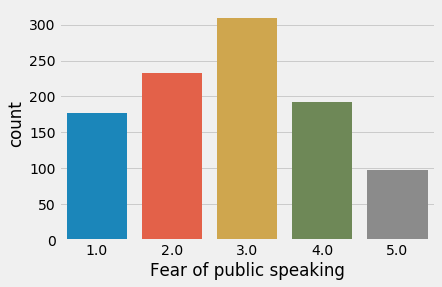

In [0]:
sns.countplot(data = responsesData, x = 'Fear of public speaking');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


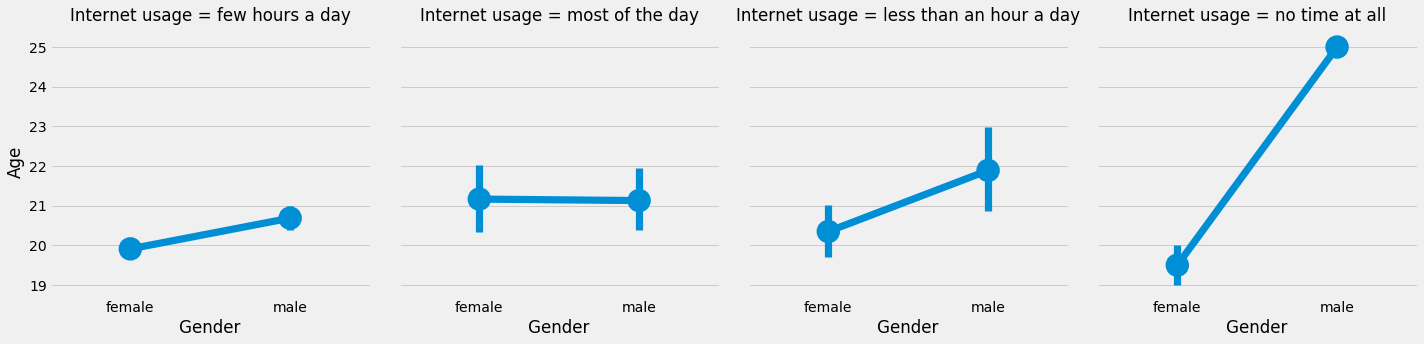

In [0]:
sns.factorplot(x='Gender', y='Age',col='Internet usage' ,data=responsesData)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


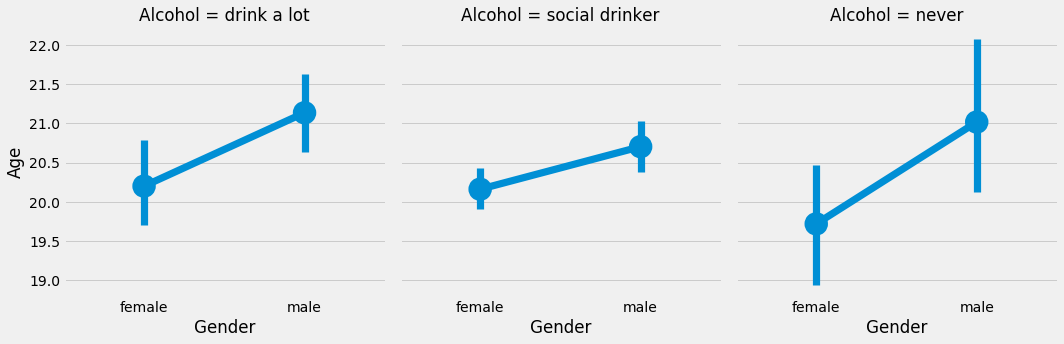

In [0]:
sns.factorplot(x='Gender', y='Age',col='Alcohol', data=responsesData)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


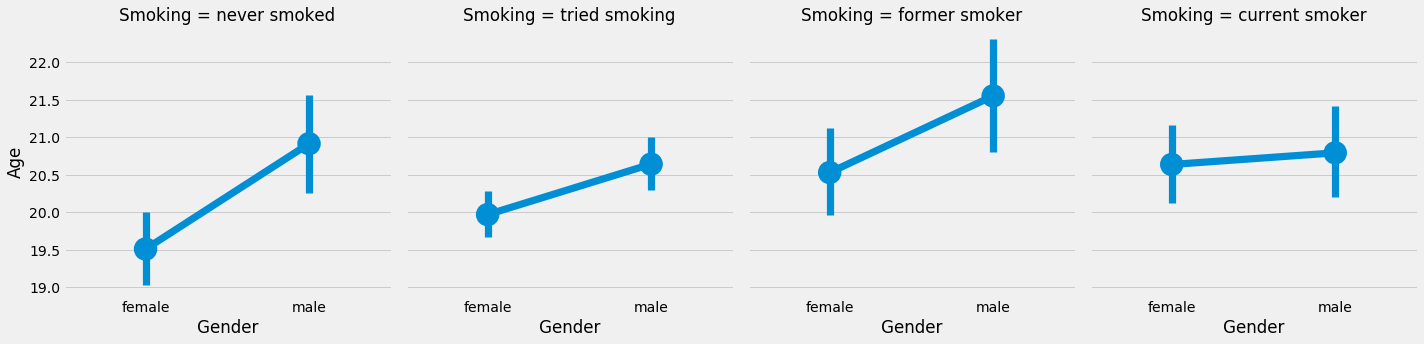

In [0]:
sns.factorplot(x='Gender', y='Age', col='Smoking', data=responsesData)

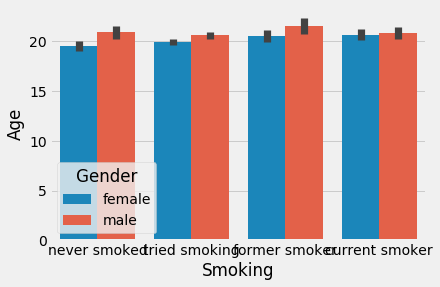

In [0]:
ax = sns.barplot(x="Smoking", y="Age", hue="Gender", data=responsesData)

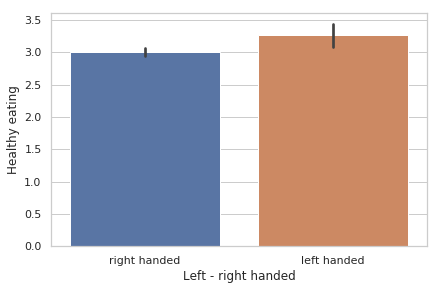

In [0]:

sns.set(style="whitegrid")
ax = sns.barplot(x="Left - right handed", y="Healthy eating", data=responsesData)

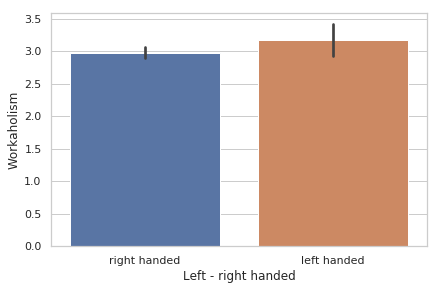

In [0]:
ax = sns.barplot(x="Left - right handed", y="Workaholism", data=responsesData)

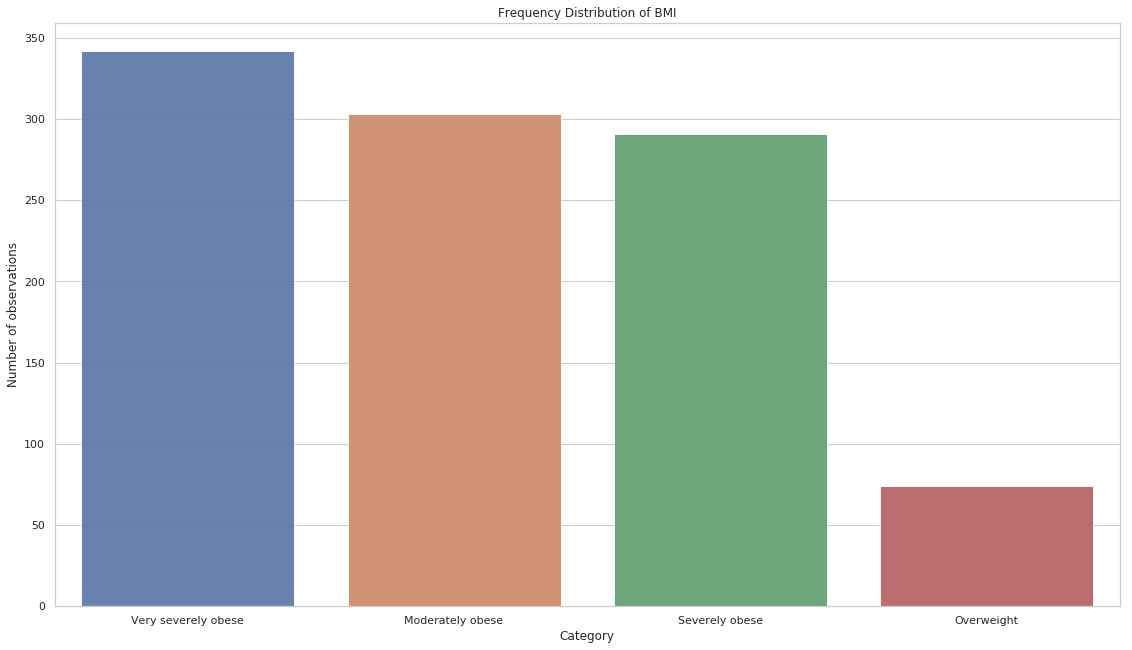

In [0]:
plt.figure(figsize=(17,10))
bmi_count = responsesData['bmiCategory'].value_counts()
sns.barplot(bmi_count.index, bmi_count.values, alpha=0.9)
plt.title('Frequency Distribution of BMI')
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

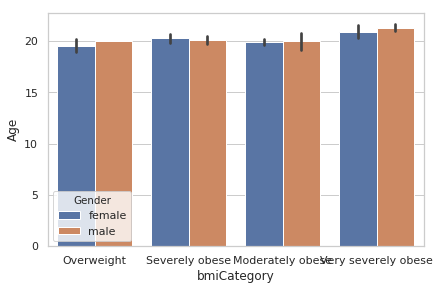

In [0]:
ax = sns.barplot(x="bmiCategory", y="Age", hue="Gender", data=responsesData)

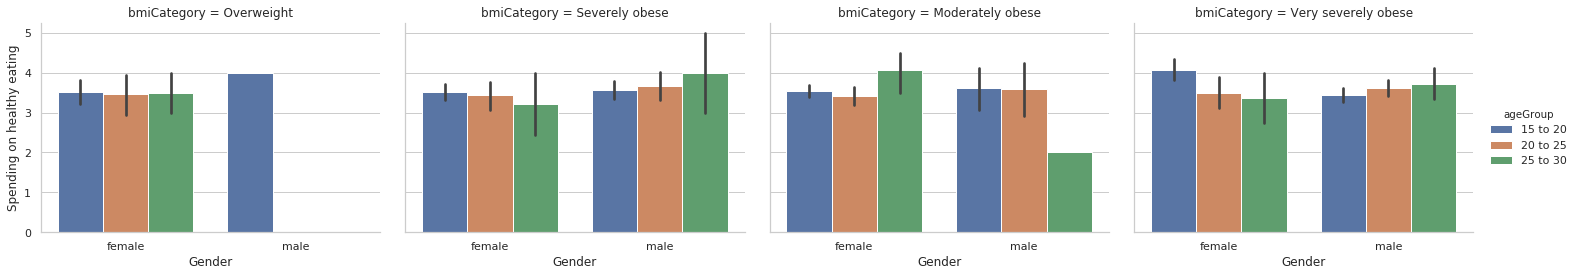

In [0]:
g = sns.catplot(x="Gender", y="Spending on healthy eating", hue="ageGroup", col="bmiCategory", data=responsesData, kind="bar", height=4, aspect=1.3);

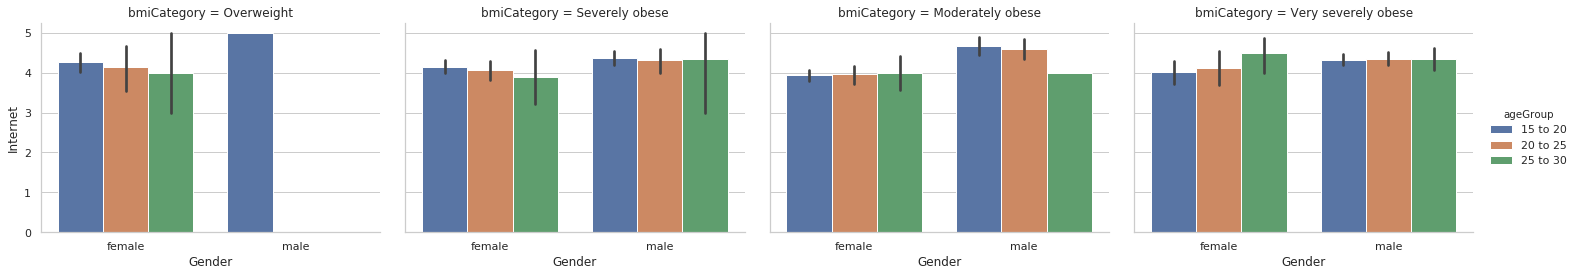

In [0]:
g = sns.catplot(x="Gender", y="Internet", hue="ageGroup", col="bmiCategory", data=responsesData, kind="bar", height=4, aspect=1.3);

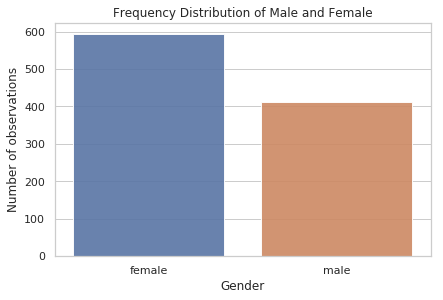

In [0]:
gender_count = responsesData['Gender'].value_counts()
sns.barplot(gender_count.index, gender_count.values, alpha=0.9)
plt.title('Frequency Distribution of Male and Female')
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

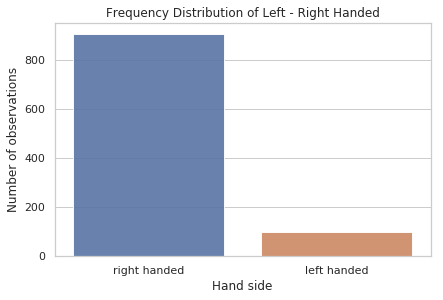

In [0]:
leftRightHand_count = responsesData['Left - right handed'].value_counts()
sns.barplot(leftRightHand_count.index, leftRightHand_count.values, alpha=0.9)
plt.title('Frequency Distribution of Left - Right Handed')
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Hand side', fontsize=12)
plt.show()

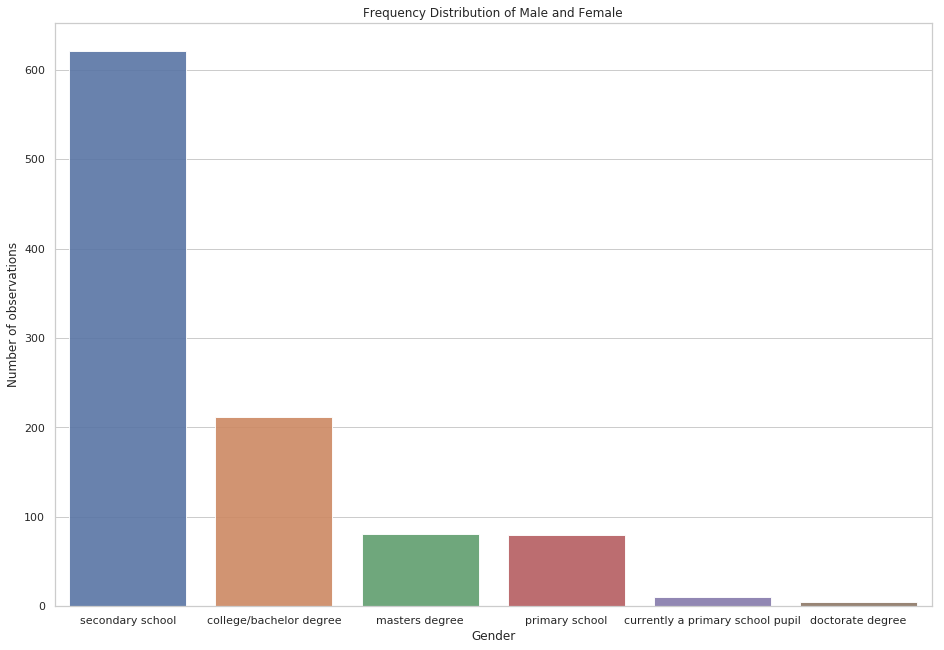

In [0]:
plt.figure(figsize=(14,10))
education_count = responsesData['Education'].value_counts()
sns.barplot(education_count.index, education_count.values, alpha=0.9)
plt.title('Frequency Distribution of Male and Female')
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.show()

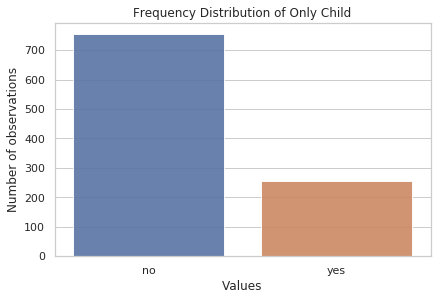

In [0]:
onlyChild_count = responsesData['Only child'].value_counts()
sns.barplot(onlyChild_count.index, onlyChild_count.values, alpha=0.9)
plt.title('Frequency Distribution of Only Child')
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Values', fontsize=12)
plt.show()

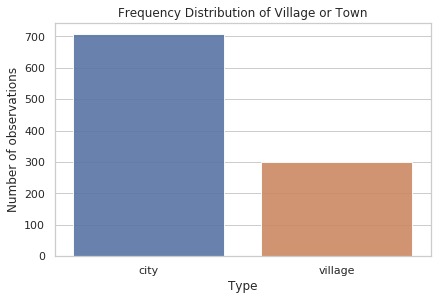

In [0]:
villageTown_count = responsesData['Village - town'].value_counts()
sns.barplot(villageTown_count.index, villageTown_count.values, alpha=0.9)
plt.title('Frequency Distribution of Village or Town')
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

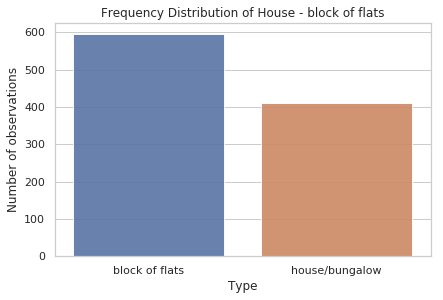

In [0]:
house_count = responsesData['House - block of flats'].value_counts()
sns.barplot(house_count.index, house_count.values, alpha=0.9)
plt.title('Frequency Distribution of House - block of flats')
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

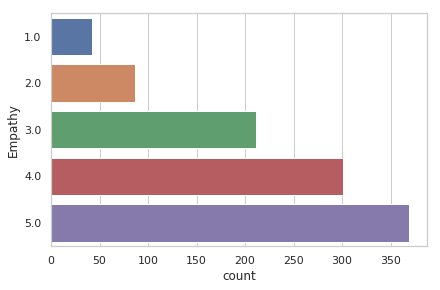

In [0]:
sns.countplot(data = responsesData, y = 'Empathy');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


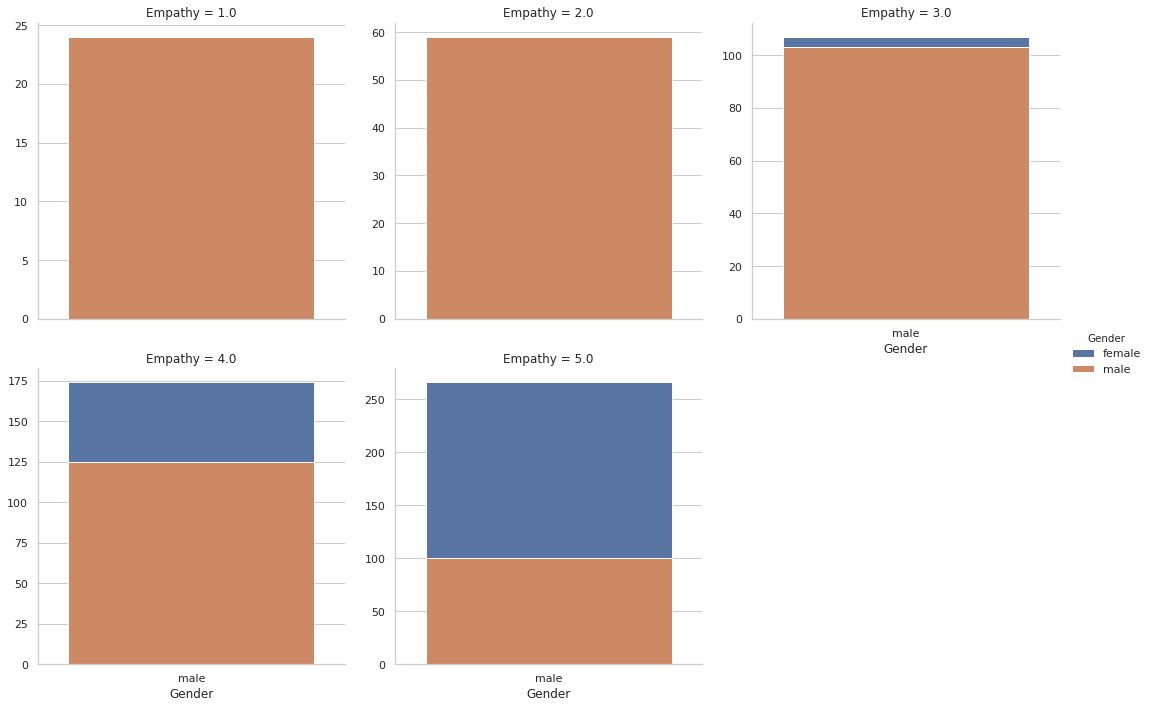

In [0]:
facet = sns.FacetGrid(data = responsesData, col = "Empathy", hue = "Gender", legend_out = True, sharey = False, size = 5,col_wrap=3)
facet = facet.map(sns.countplot, "Gender")
facet.add_legend()

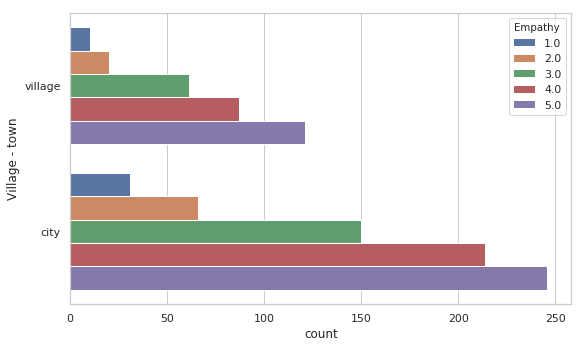

In [0]:
plt.figure(figsize=(8,5))
sns.countplot(y="Village - town", hue="Empathy", data=responsesData);
plt.show()


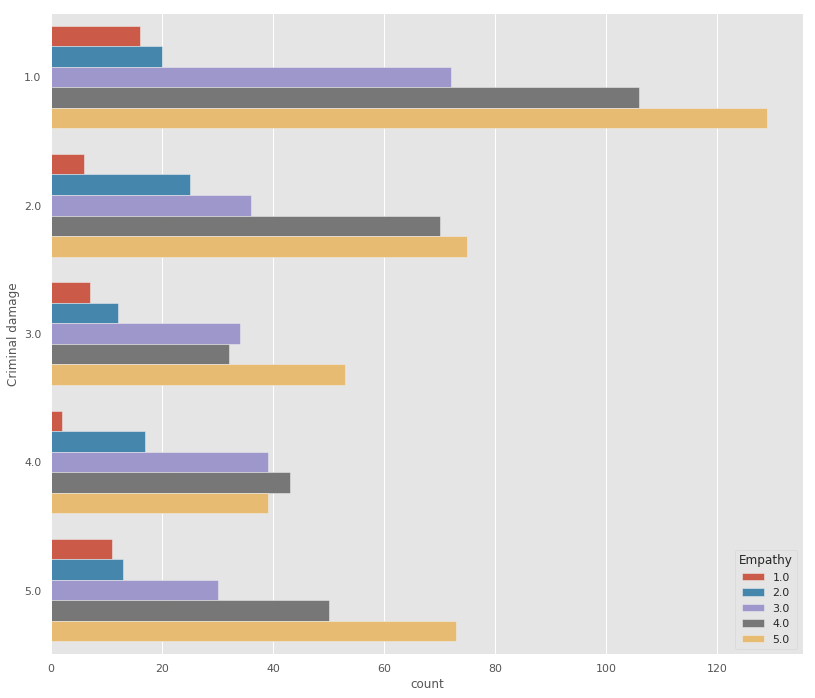

In [0]:
plt.figure(figsize=(12,11))
sns.countplot(y="Criminal damage", hue="Empathy", data=responsesData);
plt.show()


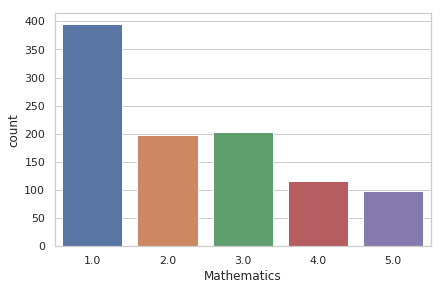

In [0]:
sns.countplot(responsesData['Mathematics'])